In [1]:
from tmg_hmc import TMGSampler 
import matplotlib.pyplot as plt
import numpy as np

# Pinched Quadratic

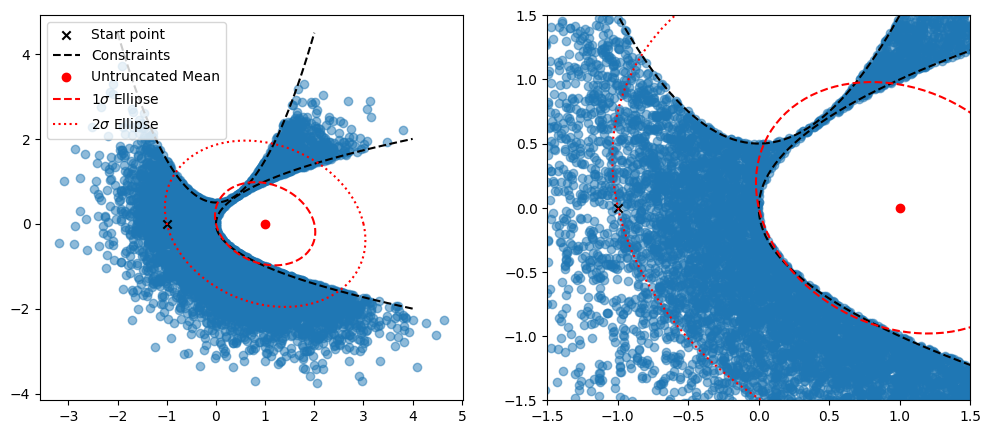

In [2]:
mu = np.array([1,0])
sigma = np.array([[1.0, -0.2], [-0.2, 1.0]])

sampler = TMGSampler(mu, sigma, gpu=False)
sampler.add_constraint(A=np.array([[1.,0],[0,0]]), f=np.array([0,-1.]), c=0.5, sparse=True, compiled=True) # X2 <= X1^2 + 0.5
sampler.add_constraint(A=np.array([[0,0],[0,1.]]), f=np.array([-1.,0]), c=0, sparse=True, compiled=True) # X1 <= X2^2
x0 = np.array([-1,0]).reshape(-1, 1)
samples = sampler.sample(x0, 10000, 100)

theta = np.linspace(0, 2 * np.pi, 100)
ellipse = np.array([np.linalg.cholesky(sigma).T @ np.array([np.cos(theta_i), np.sin(theta_i)]).reshape(-1, 1) + mu.reshape(-1, 1) for theta_i in theta])
ellipse2 = np.array([2*np.linalg.cholesky(sigma).T @ np.array([np.cos(theta_i), np.sin(theta_i)]).reshape(-1, 1) + mu.reshape(-1, 1) for theta_i in theta])

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
for i in range(2):
    ax = axs[i]
    ax.scatter(samples[:, 0], samples[:, 1], alpha=0.5)
    ax.scatter(x0[0], x0[1], color='k', marker='x', label='Start point')
    # Plot constraint boundary
    x = np.linspace(-2,2,100)
    ax.plot(x, x**2+0.5, color='black', linestyle='--', label='Constraints')
    ax.plot(x**2, x, color='black', linestyle='--')
    # Plot true mean and 1 sigma ellipse
    ax.scatter(mu[0], mu[1], color='red', label='Untruncated Mean')
    ax.plot(ellipse[:, 0], ellipse[:, 1], color='red', linestyle='--', label=r'1$\sigma$ Ellipse')
    ax.plot(ellipse2[:, 0], ellipse2[:, 1], color='red', linestyle=':', label=r'2$\sigma$ Ellipse')
axs[0].legend()
axs[1].set_xlim(-1.5,1.5)
axs[1].set_ylim(-1.5,1.5)
plt.show()

# Fully Constrained

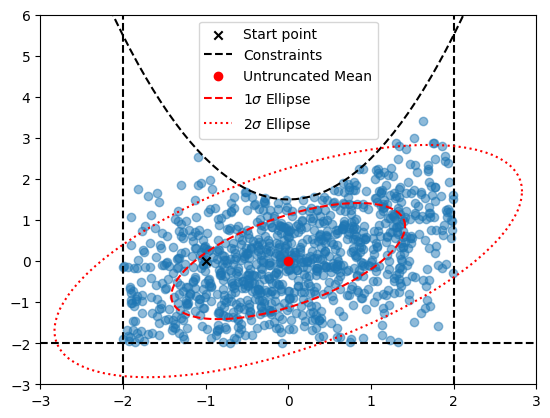

In [3]:
mu = np.array([0.0, 0.0]).reshape(-1, 1)
sigma = 2*np.array([[1.0, 0.6], [0.6, 1.0]])
sampler = TMGSampler(mu, sigma, gpu=False)
sampler.add_constraint(A=np.array([[1.,0],[0,0.]]), f=np.array([0.,-1.]), c=1.5, sparse=True, compiled=True) # X1 <= X2^2 + 1.5
sampler.add_constraint(A=-np.array([[1.,0],[0,0]]), c=4, sparse=True, compiled=True) # |X1| <= 2
sampler.add_constraint(f=np.array([0., 1.]), c=2, sparse=True, compiled=True) # X2 >= -2
x0 = np.array([-1,0]).reshape(-1, 1)
samples = sampler.sample(x0, 1000, 100)
theta = np.linspace(0, 2 * np.pi, 100)
scale = np.linalg.cholesky(sigma)
ellipse = np.array([scale @ np.array([np.cos(theta_i), np.sin(theta_i)]).reshape(-1, 1) + mu.reshape(-1, 1) for theta_i in theta])
ellipse2 = np.array([2*scale @ np.array([np.cos(theta_i), np.sin(theta_i)]).reshape(-1, 1) + mu.reshape(-1, 1) for theta_i in theta])

fig, ax = plt.subplots()
ax.scatter(samples[:, 0], samples[:, 1], alpha=0.5)
ax.scatter(x0[0], x0[1], color='k', marker='x', label='Start point')
# Plot constraint boundary
x = np.linspace(-3,6,100)
ax.plot(x, x**2 + 1.5, color='black', linestyle='--', label='Constraints')
ax.plot(2*np.ones_like(x), x, color='black', linestyle='--')
ax.plot(-2*np.ones_like(x), x, color='black', linestyle='--')
ax.plot(x, -2*np.ones_like(x), color='black', linestyle='--',)
# Plot true mean and 1 sigma ellipse
ax.scatter(mu[0], mu[1], color='red', label='Untruncated Mean')
ax.plot(ellipse[:, 0], ellipse[:, 1], color='red', linestyle='--', label=r'1$\sigma$ Ellipse')
ax.plot(ellipse2[:, 0], ellipse2[:, 1], color='red', linestyle=':', label=r'2$\sigma$ Ellipse')
ax.legend()
ax.set_xlim(-3,3)
ax.set_ylim(-3,6)
plt.show()